In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
ad=pd.read_csv(r"C:\Users\wappu\Downloads\archive\CarPrice.csv")


In [5]:
ad

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
ad.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
ad.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [17]:
ad.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
ad.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [7]:
ad.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [9]:
ad.size

5330

In [10]:
ad.shape

(205, 26)

In [11]:
ad.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [12]:
ad.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [16]:
print(ad['wheelbase'].max())
print(ad['carlength'].max())
print(ad['carwidth'].max())
print(ad['carheight'].max())

120.9
208.1
72.3
59.8


## VISUALIZING DATA

Text(0.5, 1.0, 'Horsepower')

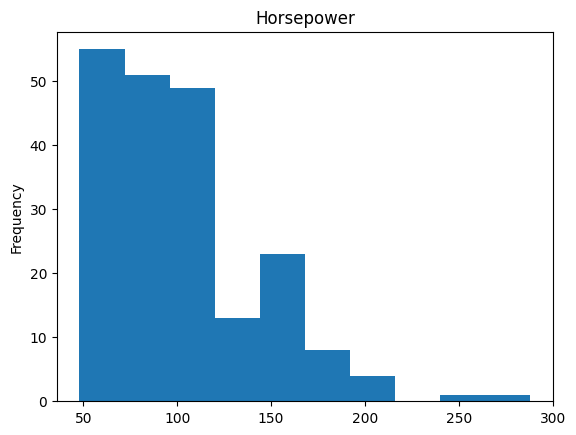

In [24]:
ad['horsepower'].plot.hist()
plt.title('Horsepower')

<Axes: >

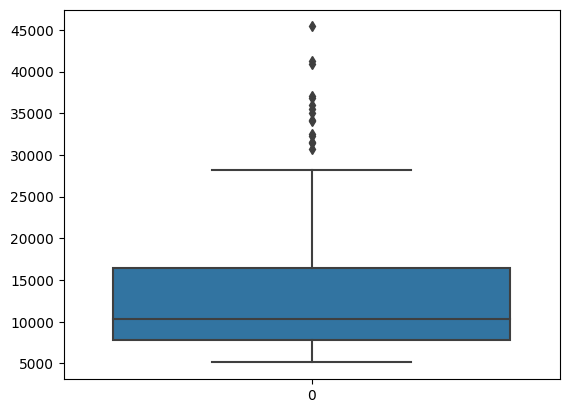

In [26]:
sns.boxplot(ad['price'])

fueltype
gas       185
diesel     20
Name: count, dtype: int64

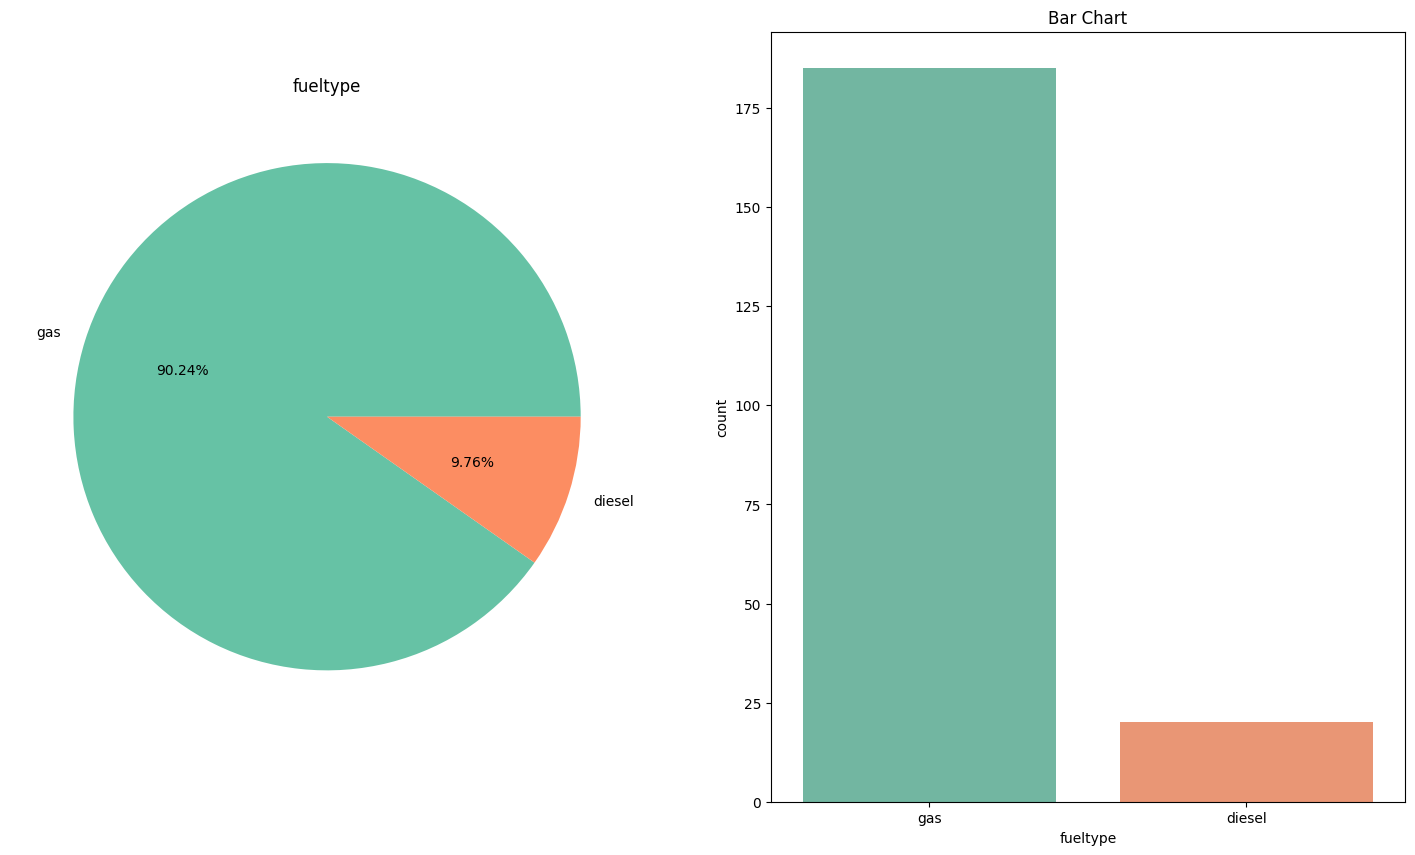

In [40]:
labels=ad['fueltype'].dropna().unique()
colour=sns.color_palette('Set2')
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
plt.title('fueltype')
plt.pie(ad['fueltype'].value_counts(),labels=labels,colors=colour,autopct='%.2f%%')
plt.subplot(1,2,2)
plt.title('Bar Chart')
sns.countplot(x='fueltype',data=ad,palette=colour)
ad.fueltype.value_counts(dropna=False)

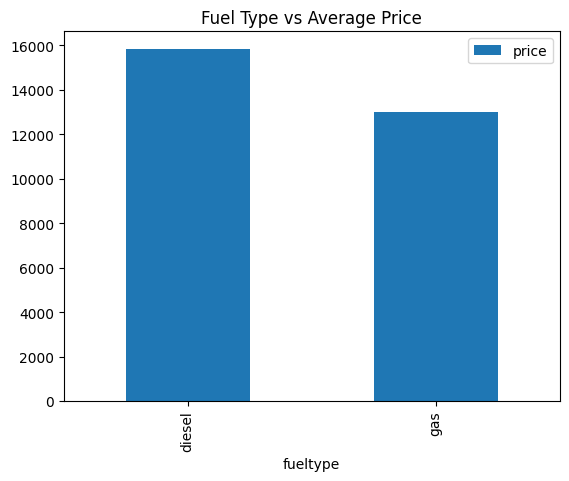

In [43]:
bc=pd.DataFrame(ad.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
bc.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()


<Axes: ylabel='Prices'>

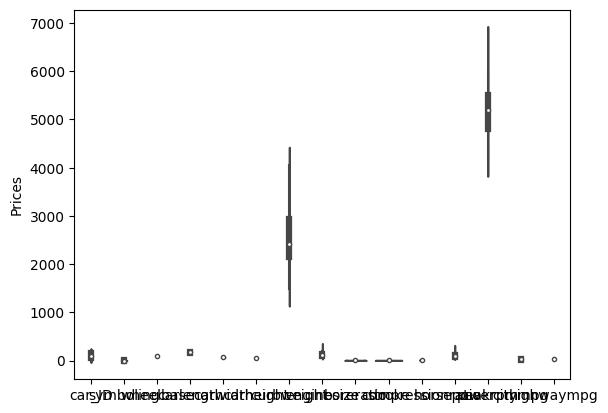

In [48]:
a=ad.drop(columns="price")
plt.ylabel("Prices")
sns.violinplot(a)

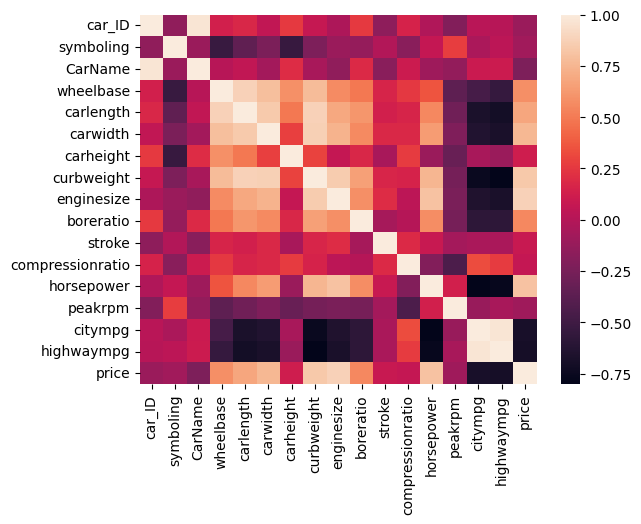

In [148]:
numeric_ad = ad.select_dtypes(include=['number'])
corr= numeric_ad.corr()

sns.heatmap(corr, annot=False)
plt.show()

<Axes: xlabel='enginelocation', ylabel='price'>

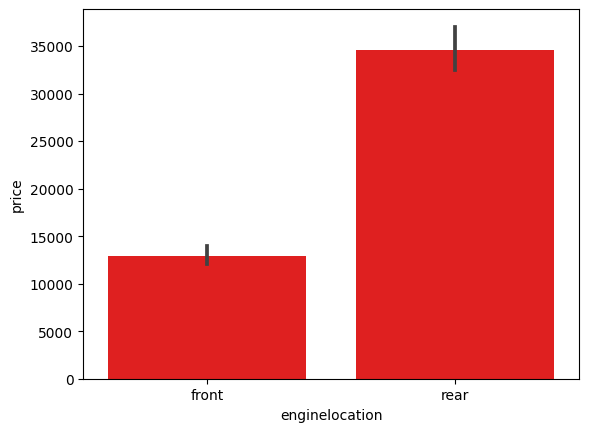

In [64]:
sns.barplot(x="enginelocation",y="price",palette=["r"],data=ad)

In [19]:
x=ad.iloc[:,[0,1]]
y=ad.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [18]:
x_train

,car_ID,symboling,CarName
100,101,0,nissan nv200
44,45,1,isuzu D-Max
94,95,1,nissan leaf
133,134,2,saab 99le
124,125,3,plymouth duster
...,...,...,...
58,59,3,mazda glc 4
21,22,1,dodge rampage
49,50,0,jaguar xk
64,65,0,mazda 626


In [128]:
y_train

100     9549.0
44      8916.5
94      7299.0
133    12170.0
124    12764.0
        ...   
58     15645.0
21      5572.0
49     36000.0
64     11245.0
68     28248.0
Name: price, Length: 143, dtype: float64

In [104]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 3)
(62, 3)
(143,)
(62,)


In [140]:
z = LogisticRegression()
y_trainn = y_train.round().astype(int)
z.fit(x_train, y_trainn)


LogisticRegression()

In [142]:
y_pred=z.predict(x_test)
print(y_pred)

[15645  5572 31600  8495  7957 18950  7975 15645  7898  5572  8921  8948
  9980 21485 18950  7295  8948  7898  5572 15645 15645 35056  7898  9495
  8495  7898  8495  7295  5572  6795  8921  7295  5572  6229 16558 15645
 15645  8948  9495  7898 12940  8495  8921  7957  9495 18150  8948  8921
 15645  6229  7295  7975 12764 21485 16515  8921  8921  7898  5572 18150
 31600  7957]


In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [111]:
print("Accuracy :",lr.score(x_test,y_test))

Accuracy : 1.0


In [149]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

        5389       0.00      0.00      0.00       1.0
        5572       0.00      0.00      0.00       0.0
        6189       0.00      0.00      0.00       1.0
        6229       0.00      0.00      0.00       0.0
        6295       0.00      0.00      0.00       1.0
        6338       0.00      0.00      0.00       1.0
        6377       0.00      0.00      0.00       1.0
        6488       0.00      0.00      0.00       1.0
        6692       0.00      0.00      0.00       1.0
        6795       0.00      0.00      0.00       0.0
        6849       0.00      0.00      0.00       1.0
        6938       0.00      0.00      0.00       1.0
        7053       0.00      0.00      0.00       1.0
        7099       0.00      0.00      0.00       1.0
        7295       0.00      0.00      0.00       0.0
        7349       0.00      0.00      0.00       1.0
        7609       0.00      0.00      0.00       1.0
    

<BarContainer object of 62 artists>

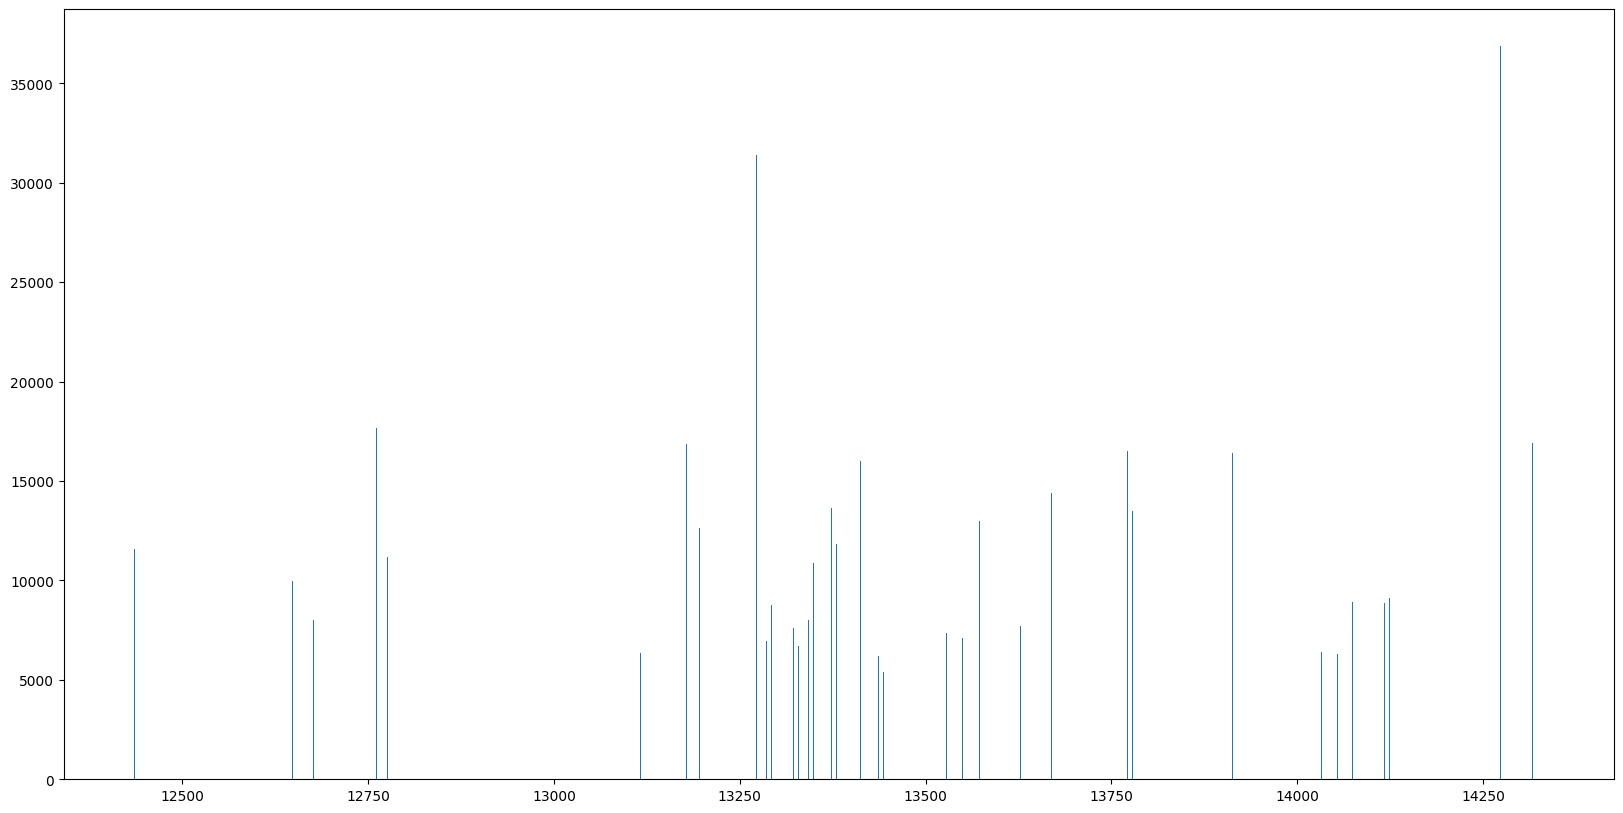

In [21]:
prediction=lr.predict(x_test)
expected=y_test
plt.figure(figsize=(20,10))
x=prediction
y=expected
plt.bar(x,y)